***Imports necessários***

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

*Carregamento dos dados (csv's)*

In [162]:
injetado = pd.read_csv('energia-injetada-na-rede-de-distribuicao.csv',delimiter=';');
produzido = pd.read_csv('energia-produzida-total-nacional.csv',delimiter=';');
consumido = pd.read_csv('consumo-total-nacional.csv',delimiter=';');
preco = pd.read_csv('entsoe_day_ahead_PT_dailyavg_4y.csv');
luz_solar =  pd.read_csv('sunlight_perday.csv');

### Informação dos dataframes originais

In [163]:
preco = preco.iloc[1:,:]

Visualizar pequena amostra dos dataframes

In [164]:
preco.head()

,date,avg_price_eur_mwh
1,2023-01-01,18.194000
2,2023-01-02,111.630000
3,2023-01-03,136.436667
4,2023-01-04,114.217917
5,2023-01-05,109.020833


In [165]:
precoII = preco.copy()
precoII['date'] = pd.to_datetime(precoII['date'])
precoII.set_index('date',drop=True,inplace=True)
precoII.head()

,avg_price_eur_mwh
date,
2023-01-01,18.194000
2023-01-02,111.630000
2023-01-03,136.436667
2023-01-04,114.217917
2023-01-05,109.020833


In [166]:
injetado.head()

,Data/Hora,Dia,Mês,Ano,Data,Hora,Cogeração (kWh),Eólica (kWh),Fotovoltaica (kWh),Hídrica (kWh),Outras Tecnologias (kWh),Rede Distribuição (kWh)
0,2024-12-01T01:30:00+00:00,1,12,2024,2024-12-01,01:30,65302.25,470343.00,0.0,15520.00,47144.841,598310.091
1,2024-12-01T02:00:00+00:00,1,12,2024,2024-12-01,02:00,66912.25,480471.25,0.0,15785.00,46545.885,609714.385
2,2024-12-01T03:15:00+00:00,1,12,2024,2024-12-01,03:15,66242.25,503178.50,0.0,14488.00,45818.386,629727.136
3,2024-12-01T03:30:00+00:00,1,12,2024,2024-12-01,03:30,66823.25,513665.25,0.0,14444.75,47138.854,642072.104
4,2024-12-01T05:15:00+00:00,1,12,2024,2024-12-01,05:15,66463.25,468322.00,0.0,13993.25,46508.978,595287.478


In [167]:
produzido.head()

,Data/Hora,Dia,Mês,Ano,Data,Hora,Mercado (kWh),Regime Especial (kWh),Total (kWh)
0,2023-02-09T11:15:00+00:00,9,2,2023,2023-02-09,11:15,1140013.0,665714.25,1805727.25
1,2023-02-09T15:15:00+00:00,9,2,2023,2023-02-09,15:15,1296313.0,398335.25,1694648.25
2,2023-02-10T16:00:00+00:00,10,2,2023,2023-02-10,16:00,930920.0,855707.00,1786627.00
3,2023-02-10T18:00:00+00:00,10,2,2023,2023-02-10,18:00,972023.0,872944.00,1844967.00
4,2023-02-11T01:30:00+00:00,11,2,2023,2023-02-11,01:30,349810.0,1022128.00,1371938.00


In [168]:
consumido.head()

,Data/Hora,Dia,Mês,Ano,Data,Hora,Baixa Tensão (kWh),Média Tensão (kWh),Alta Tensão (kWh),Muito Alta Tensão (kWh),Total (kWh)
0,2023-01-04T01:30:00+00:00,4,1,2023,2023-01-04,01:30,6.735556e+05,377412.1436,187192.9716,89267.0748,1.327428e+06
1,2023-01-04T02:15:00+00:00,4,1,2023,2023-01-04,02:15,6.324623e+05,370023.2829,184471.7922,80484.4072,1.267442e+06
2,2023-01-05T16:15:00+00:00,5,1,2023,2023-01-05,16:15,8.686877e+05,635971.5598,190789.7991,58737.4554,1.754186e+06
3,2023-01-05T17:45:00+00:00,5,1,2023,2023-01-05,17:45,1.036349e+06,600367.4528,195042.8577,42521.6244,1.874281e+06
4,2023-01-06T02:45:00+00:00,6,1,2023,2023-01-06,02:45,6.264076e+05,375791.7374,189309.0279,76947.9087,1.268456e+06


In [169]:
luz_solar.head()

,Unnamed: 0,Data,Sunlight (em minutos)
0,0,2023-01-01,566.4
1,1,2023-01-02,567.0
2,2,2023-01-03,568.2
3,3,2023-01-04,568.8
4,4,2023-01-05,570.0


In [170]:
luz_solar.drop('Unnamed: 0',axis=1,inplace=True)

In [171]:
print('Injetado(shape):',injetado.shape)
print('Consumido(shape):',consumido.shape)
print('Produzido(shape):',produzido.shape)
print('Preço(shape):',preco.shape)
print('Luz_solar(shape):',luz_solar.shape)

Injetado(shape): (109933, 12)
Consumido(shape): (110221, 11)
Produzido(shape): (109933, 9)
Preço(shape): (1153, 2)
Luz_solar(shape): (1150, 2)


In [172]:
luz_solar['Data']

0       2023-01-01
1       2023-01-02
2       2023-01-03
3       2023-01-04
4       2023-01-05
           ...    
1145    2026-02-19
1146    2026-02-20
1147    2026-02-21
1148    2026-02-22
1149    2026-02-23
Name: Data, Length: 1150, dtype: object

In [173]:
preco['date']

1       2023-01-01
2       2023-01-02
3       2023-01-03
4       2023-01-04
5       2023-01-05
           ...    
1149    2026-02-22
1150    2026-02-23
1151    2026-02-24
1152    2026-02-25
1153    2026-02-26
Name: date, Length: 1153, dtype: object

In [174]:
for p in list(preco['date']):
    if str(p) not in list(luz_solar['Data']):
        print(p)

2026-02-24
2026-02-25
2026-02-26


In [175]:
preco.tail()

,date,avg_price_eur_mwh
1149,2026-02-22,26.136076
1150,2026-02-23,25.218111
1151,2026-02-24,30.331618
1152,2026-02-25,29.417931
1153,2026-02-26,79.756500


## Juntar os datasets

In [176]:
df = injetado.merge(consumido,on='Data/Hora',how='inner')
df.head()

,Data/Hora,Dia_x,Mês_x,Ano_x,Data_x,Hora_x,Cogeração (kWh),Eólica (kWh),Fotovoltaica (kWh),Hídrica (kWh),...,Dia_y,Mês_y,Ano_y,Data_y,Hora_y,Baixa Tensão (kWh),Média Tensão (kWh),Alta Tensão (kWh),Muito Alta Tensão (kWh),Total (kWh)
0,2024-12-01T01:30:00+00:00,1,12,2024,2024-12-01,01:30,65302.25,470343.00,0.0,15520.00,...,1,12,2024,2024-12-01,01:30,592532.955473,287985.9713,200478.7664,93272.4162,1.174270e+06
1,2024-12-01T02:00:00+00:00,1,12,2024,2024-12-01,02:00,66912.25,480471.25,0.0,15785.00,...,1,12,2024,2024-12-01,02:00,565779.817171,285096.4635,199081.6537,85699.4590,1.135657e+06
2,2024-12-01T03:15:00+00:00,1,12,2024,2024-12-01,03:15,66242.25,503178.50,0.0,14488.00,...,1,12,2024,2024-12-01,03:15,522073.741047,279149.8605,199194.3734,84687.1666,1.085105e+06
3,2024-12-01T03:30:00+00:00,1,12,2024,2024-12-01,03:30,66823.25,513665.25,0.0,14444.75,...,1,12,2024,2024-12-01,03:30,513901.486719,278234.8154,200238.9797,85355.8453,1.077731e+06
4,2024-12-01T05:15:00+00:00,1,12,2024,2024-12-01,05:15,66463.25,468322.00,0.0,13993.25,...,1,12,2024,2024-12-01,05:15,496285.574391,276626.0285,193322.8748,91739.0145,1.057973e+06


In [177]:
df.shape

(109885, 22)

In [178]:
df = df.merge(produzido,on='Data/Hora',how='inner')
df.head()

,Data/Hora,Dia_x,Mês_x,Ano_x,Data_x,Hora_x,Cogeração (kWh),Eólica (kWh),Fotovoltaica (kWh),Hídrica (kWh),...,Muito Alta Tensão (kWh),Total (kWh)_x,Dia,Mês,Ano,Data,Hora,Mercado (kWh),Regime Especial (kWh),Total (kWh)_y
0,2024-12-01T01:30:00+00:00,1,12,2024,2024-12-01,01:30,65302.25,470343.00,0.0,15520.00,...,93272.4162,1.174270e+06,1,12,2024,2024-12-01,01:30,575960.0,598310.091,1174270.091
1,2024-12-01T02:00:00+00:00,1,12,2024,2024-12-01,02:00,66912.25,480471.25,0.0,15785.00,...,85699.4590,1.135657e+06,1,12,2024,2024-12-01,02:00,525943.0,609714.385,1135657.385
2,2024-12-01T03:15:00+00:00,1,12,2024,2024-12-01,03:15,66242.25,503178.50,0.0,14488.00,...,84687.1666,1.085105e+06,1,12,2024,2024-12-01,03:15,455378.0,629727.136,1085105.136
3,2024-12-01T03:30:00+00:00,1,12,2024,2024-12-01,03:30,66823.25,513665.25,0.0,14444.75,...,85355.8453,1.077731e+06,1,12,2024,2024-12-01,03:30,435659.0,642072.104,1077731.104
4,2024-12-01T05:15:00+00:00,1,12,2024,2024-12-01,05:15,66463.25,468322.00,0.0,13993.25,...,91739.0145,1.057973e+06,1,12,2024,2024-12-01,05:15,462686.0,595287.478,1057973.478


In [179]:
df.shape

(109981, 30)

In [180]:
preco['Data'] = preco['date']
preco.drop('date',axis=1,inplace=True)
df = df.merge(preco,on='Data',how='inner')
df.head()

,Data/Hora,Dia_x,Mês_x,Ano_x,Data_x,Hora_x,Cogeração (kWh),Eólica (kWh),Fotovoltaica (kWh),Hídrica (kWh),...,Total (kWh)_x,Dia,Mês,Ano,Data,Hora,Mercado (kWh),Regime Especial (kWh),Total (kWh)_y,avg_price_eur_mwh
0,2024-12-01T01:30:00+00:00,1,12,2024,2024-12-01,01:30,65302.25,470343.00,0.0,15520.00,...,1.174270e+06,1,12,2024,2024-12-01,01:30,575960.0,598310.091,1174270.091,128.054348
1,2024-12-01T02:00:00+00:00,1,12,2024,2024-12-01,02:00,66912.25,480471.25,0.0,15785.00,...,1.135657e+06,1,12,2024,2024-12-01,02:00,525943.0,609714.385,1135657.385,128.054348
2,2024-12-01T03:15:00+00:00,1,12,2024,2024-12-01,03:15,66242.25,503178.50,0.0,14488.00,...,1.085105e+06,1,12,2024,2024-12-01,03:15,455378.0,629727.136,1085105.136,128.054348
3,2024-12-01T03:30:00+00:00,1,12,2024,2024-12-01,03:30,66823.25,513665.25,0.0,14444.75,...,1.077731e+06,1,12,2024,2024-12-01,03:30,435659.0,642072.104,1077731.104,128.054348
4,2024-12-01T05:15:00+00:00,1,12,2024,2024-12-01,05:15,66463.25,468322.00,0.0,13993.25,...,1.057973e+06,1,12,2024,2024-12-01,05:15,462686.0,595287.478,1057973.478,128.054348


In [181]:
df.shape

(109981, 31)

In [182]:
df = df.merge(luz_solar,on='Data',how='inner')
df.head()

,Data/Hora,Dia_x,Mês_x,Ano_x,Data_x,Hora_x,Cogeração (kWh),Eólica (kWh),Fotovoltaica (kWh),Hídrica (kWh),...,Dia,Mês,Ano,Data,Hora,Mercado (kWh),Regime Especial (kWh),Total (kWh)_y,avg_price_eur_mwh,Sunlight (em minutos)
0,2024-12-01T01:30:00+00:00,1,12,2024,2024-12-01,01:30,65302.25,470343.00,0.0,15520.00,...,1,12,2024,2024-12-01,01:30,575960.0,598310.091,1174270.091,128.054348,574.8
1,2024-12-01T02:00:00+00:00,1,12,2024,2024-12-01,02:00,66912.25,480471.25,0.0,15785.00,...,1,12,2024,2024-12-01,02:00,525943.0,609714.385,1135657.385,128.054348,574.8
2,2024-12-01T03:15:00+00:00,1,12,2024,2024-12-01,03:15,66242.25,503178.50,0.0,14488.00,...,1,12,2024,2024-12-01,03:15,455378.0,629727.136,1085105.136,128.054348,574.8
3,2024-12-01T03:30:00+00:00,1,12,2024,2024-12-01,03:30,66823.25,513665.25,0.0,14444.75,...,1,12,2024,2024-12-01,03:30,435659.0,642072.104,1077731.104,128.054348,574.8
4,2024-12-01T05:15:00+00:00,1,12,2024,2024-12-01,05:15,66463.25,468322.00,0.0,13993.25,...,1,12,2024,2024-12-01,05:15,462686.0,595287.478,1057973.478,128.054348,574.8


In [183]:
df.columns

Index(['Data/Hora', 'Dia_x', 'Mês_x', 'Ano_x', 'Data_x', 'Hora_x',
       'Cogeração (kWh)', 'Eólica (kWh)', 'Fotovoltaica (kWh)',
       'Hídrica (kWh)', 'Outras Tecnologias (kWh)', 'Rede Distribuição (kWh)',
       'Dia_y', 'Mês_y', 'Ano_y', 'Data_y', 'Hora_y', 'Baixa Tensão (kWh)',
       'Média Tensão (kWh)', 'Alta Tensão (kWh)', 'Muito Alta Tensão (kWh)',
       'Total (kWh)_x', 'Dia', 'Mês', 'Ano', 'Data', 'Hora', 'Mercado (kWh)',
       'Regime Especial (kWh)', 'Total (kWh)_y', 'avg_price_eur_mwh',
       'Sunlight (em minutos)'],
      dtype='object')

In [184]:
print(df[df['Data']!=df['Data_x']].shape)
print(df[df['Data']!=df['Data_y']].shape)
print(df[df['Dia']!=df['Dia_x']].shape)
print(df[df['Dia']!=df['Dia_y']].shape)

(0, 32)
(0, 32)
(0, 32)
(0, 32)


In [185]:
df['Total (kWh) (Consumido)'] = df['Total (kWh)_x']
df['Total (kWh) (Produzido)'] = df['Total (kWh)_y']

In [186]:
columns_drop = ['Dia_x','Mês_x','Ano_x','Data_x','Hora_x','Dia_y','Mês_y','Ano_y','Data_y','Hora_y','Total (kWh)_x','Total (kWh)_y']

In [187]:
for c in columns_drop:
    df.drop(c,axis=1,inplace=True)

In [188]:
df.isnull().sum()

Data/Hora                   0
Cogeração (kWh)             0
Eólica (kWh)                0
Fotovoltaica (kWh)          0
Hídrica (kWh)               0
Outras Tecnologias (kWh)    0
Rede Distribuição (kWh)     0
Baixa Tensão (kWh)          0
Média Tensão (kWh)          0
Alta Tensão (kWh)           0
Muito Alta Tensão (kWh)     0
Dia                         0
Mês                         0
Ano                         0
Data                        0
Hora                        0
Mercado (kWh)               0
Regime Especial (kWh)       0
avg_price_eur_mwh           0
Sunlight (em minutos)       0
Total (kWh) (Consumido)     0
Total (kWh) (Produzido)     0
dtype: int64

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109981 entries, 0 to 109980
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Data/Hora                 109981 non-null  object 
 1   Cogeração (kWh)           109981 non-null  float64
 2   Eólica (kWh)              109981 non-null  float64
 3   Fotovoltaica (kWh)        109981 non-null  float64
 4   Hídrica (kWh)             109981 non-null  float64
 5   Outras Tecnologias (kWh)  109981 non-null  float64
 6   Rede Distribuição (kWh)   109981 non-null  float64
 7   Baixa Tensão (kWh)        109981 non-null  float64
 8   Média Tensão (kWh)        109981 non-null  float64
 9   Alta Tensão (kWh)         109981 non-null  float64
 10  Muito Alta Tensão (kWh)   109981 non-null  float64
 11  Dia                       109981 non-null  int64  
 12  Mês                       109981 non-null  int64  
 13  Ano                       109981 non-null  i

In [190]:
df.describe()

,Cogeração (kWh),Eólica (kWh),Fotovoltaica (kWh),Hídrica (kWh),Outras Tecnologias (kWh),Rede Distribuição (kWh),Baixa Tensão (kWh),Média Tensão (kWh),Alta Tensão (kWh),Muito Alta Tensão (kWh),Dia,Mês,Ano,Mercado (kWh),Regime Especial (kWh),avg_price_eur_mwh,Sunlight (em minutos),Total (kWh) (Consumido),Total (kWh) (Produzido)
count,109981.000000,1.099810e+05,109981.000000,109981.000000,109981.000000,1.099810e+05,1.099810e+05,109981.000000,109981.000000,109981.000000,109981.000000,109981.000000,109981.000000,1.099810e+05,1.099810e+05,109981.000000,109981.000000,1.099810e+05,1.099810e+05
mean,42107.022813,3.839374e+05,9399.109369,23595.893400,65396.774071,5.244362e+05,7.622991e+05,452311.478722,197598.470101,71292.390699,15.661051,6.298706,2024.084687,9.604390e+05,5.244274e+05,72.985690,725.763712,1.483501e+06,1.484866e+06
std,25470.863331,2.830175e+05,13271.313071,17321.372333,23767.494822,2.832140e+05,2.141918e+05,120512.717902,19256.419943,17242.062001,8.804726,3.533235,0.895114,3.616615e+05,2.832203e+05,36.579096,115.559519,2.786397e+05,2.783659e+05
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,2023.000000,-2.267620e+05,0.000000e+00,0.146364,563.400000,0.000000e+00,0.000000e+00
25%,19103.750000,1.496928e+05,0.250000,6168.500000,43854.468000,2.944831e+05,6.084690e+05,350009.521600,187234.566600,59152.361900,8.000000,3.000000,2023.000000,7.246130e+05,2.944607e+05,46.613333,612.600000,1.252330e+06,1.253547e+06
50%,47480.750000,3.193232e+05,183.250000,21362.000000,62524.546000,4.612802e+05,7.273177e+05,432361.067400,199737.935800,72896.314800,16.000000,6.000000,2024.000000,9.711140e+05,4.612802e+05,76.823200,722.400000,1.473203e+06,1.474199e+06
75%,63679.250000,5.651491e+05,18112.750000,40631.250000,83214.500000,7.011767e+05,8.786290e+05,554676.295600,210840.052400,85661.813000,23.000000,9.000000,2025.000000,1.214783e+06,7.011767e+05,99.293182,838.800000,1.668029e+06,1.669938e+06
max,102841.000000,1.238478e+06,50510.500000,95408.000000,144804.805006,1.466503e+06,1.729600e+06,761619.116200,244902.224000,109840.462400,31.000000,12.000000,2026.000000,2.178261e+06,1.466503e+06,151.033333,897.000000,2.561410e+06,2.561410e+06


# EDA

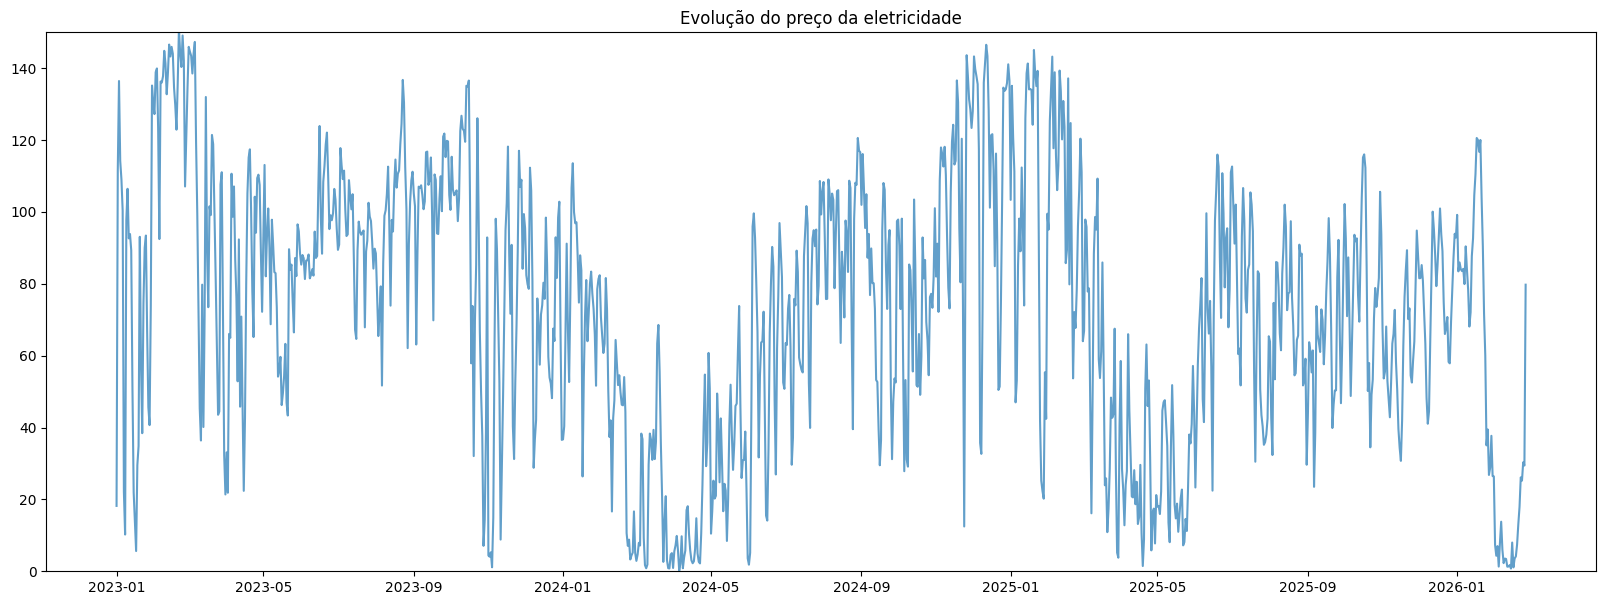

In [54]:
plt.figure(figsize=(20,7))
plt.ylim(0, 150)
plt.plot(precoII,alpha=0.7)
plt.title("Evolução do preço da eletricidade")
plt.show()